In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm

In [12]:
class PID:
    def __init__(self,k_p,k_d,k_i,inital_error):
        self.k_p=k_p
        self.k_d=k_d
        self.k_i=k_i
        self.error_sum=0
        self.prev_error=inital_error

    def update(self,error,time_step):
        self.error_sum+=error
        delta_error=error-self.prev_error
        self.prev_error=error
        return self.k_p*error+self.k_d*delta_error/time_step+self.k_i*self.error_sum

In [15]:

v=15.6464
l_r=1.7
Y=[]
y_init=0.1
Betas=[-y_init]

Psis=[]
Psi_init=0
delta_t=0.005
T=np.arange(0,20,delta_t)

Controller=PID(1,1,1,-y_init)

for t in tqdm.tqdm(T):
    newPsi=Psi_init+v/l_r*np.sum(np.sin(Betas))*delta_t
    Psis.append(newPsi)

    Y.append(y_init+v*np.sum(np.sin(np.array(Psis)+np.array(Betas)))*delta_t)
    Betas.append(Controller.update(-Y[-1],delta_t))



100%|██████████| 4000/4000 [00:01<00:00, 3055.14it/s]


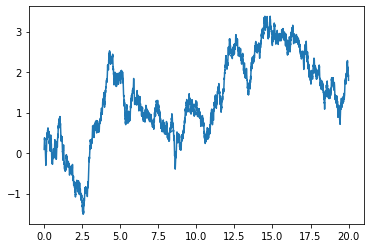

In [16]:
plt.plot(T,Y)